### Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dropout, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import pandas as pd

### Reading the data from csv file
### Data is stored in format of x,y coordinates of all 5 fingers and runs according to finger opened

In [2]:
data = pd.read_csv('6_hand_data.csv')
data.head()

,thumb_x,thumb_y,index_x,index_y,middle_x,middle_y,ring_x,ring_y,small_x,small_y,runs
0,0.568524,0.729688,0.540529,0.648647,0.603436,0.778746,0.606466,0.827977,0.594496,0.860963,1
1,0.565488,0.692211,0.535244,0.610249,0.603174,0.755669,0.605894,0.802521,0.591579,0.831874,1
2,0.562650,0.641434,0.526106,0.545266,0.596484,0.709543,0.597691,0.754647,0.583163,0.780862,1
3,0.563605,0.630489,0.529653,0.540169,0.598054,0.705837,0.597662,0.748886,0.583934,0.771489,1
4,0.561831,0.606720,0.531775,0.507468,0.595446,0.682920,0.594938,0.728781,0.580073,0.752076,1


### Plotting the graph for counting the runs distribution

In [3]:
output_classes = data.iloc[:, -1].unique()
output_classes

array([1, 2, 3, 4, 5, 6])

In [4]:
output_classes_counts = data.iloc[:, -1].value_counts()
output_count = [output_classes_counts[1], output_classes_counts[2], output_classes_counts[3], output_classes_counts[4], output_classes_counts[5], output_classes_counts[6]]

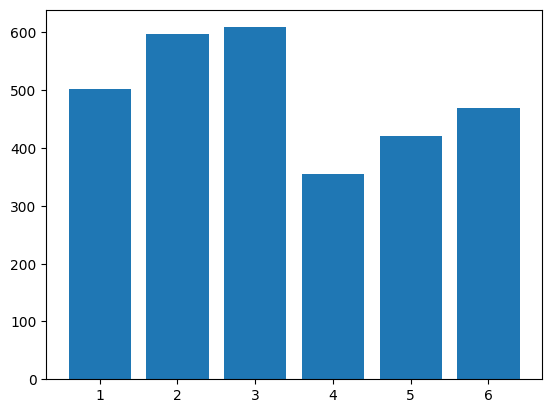

In [5]:
plt.bar(output_classes, output_count)
plt.show()

### Split data into Input and Output vector

In [71]:
hand_coordinates, runs = data.iloc[:, :-1], data.iloc[:,-1]

In [72]:
hand_coordinates

,thumb_x,thumb_y,index_x,index_y,middle_x,middle_y,ring_x,ring_y,small_x,small_y
0,0.568524,0.729688,0.540529,0.648647,0.603436,0.778746,0.606466,0.827977,0.594496,0.860963
1,0.565488,0.692211,0.535244,0.610249,0.603174,0.755669,0.605894,0.802521,0.591579,0.831874
2,0.562650,0.641434,0.526106,0.545266,0.596484,0.709543,0.597691,0.754647,0.583163,0.780862
3,0.563605,0.630489,0.529653,0.540169,0.598054,0.705837,0.597662,0.748886,0.583934,0.771489
4,0.561831,0.606720,0.531775,0.507468,0.595446,0.682920,0.594938,0.728781,0.580073,0.752076
...,...,...,...,...,...,...,...,...,...,...
2949,0.673236,0.440742,0.693626,0.561158,0.701099,0.597889,0.706767,0.631979,0.708377,0.663240
2950,0.672875,0.439260,0.693518,0.559343,0.701588,0.597980,0.706157,0.632559,0.706446,0.660544
2951,0.669850,0.435000,0.693077,0.554181,0.700612,0.591062,0.706182,0.625151,0.707184,0.653399
2952,0.668282,0.433541,0.693060,0.547988,0.700983,0.584509,0.706833,0.619215,0.707422,0.647399


### Normalize the input data so that x,y coordinates do not variate with camera resolution and hand position

In [73]:
odd_columns = hand_coordinates.iloc[:, ::2]
even_columns = hand_coordinates.iloc[:, 1::2]

min_odd = odd_columns.min(axis=1)
min_even = even_columns.min(axis=1)

min_odd = pd.Series(min_odd, index=hand_coordinates.index)
min_even = pd.Series(min_even, index=hand_coordinates.index)

hand_coordinates.iloc[:, ::2] = hand_coordinates.iloc[:, ::2].sub(min_odd, axis=0)
hand_coordinates.iloc[:, 1::2] = hand_coordinates.iloc[:, 1::2].sub(min_even, axis=0)

In [74]:
hand_coordinates.iloc[1].shape

(10,)

In [75]:
runs

0       1
1       1
2       1
3       1
4       1
       ..
2949    6
2950    6
2951    6
2952    6
2953    6
Name: runs, Length: 2954, dtype: int64

### Split the data in train and test dataset

In [94]:
hand_coordinates_train, hand_coordinates_test, runs_train, runs_test = train_test_split(hand_coordinates, runs , random_state=104, test_size=0.25, shuffle=True)

In [77]:
train_output_classes_counts = runs_train.value_counts()
test_output_classes_counts = runs_test.value_counts()
print(train_output_classes_counts)
print(test_output_classes_counts)

runs
3    457
2    446
1    372
6    353
5    309
4    278
Name: count, dtype: int64
runs
3    152
2    152
1    130
6    116
5    112
4     77
Name: count, dtype: int64


In [78]:
train_output_classes = runs_train.unique()
train_output_count = [train_output_classes_counts[1], train_output_classes_counts[2], train_output_classes_counts[3],
                train_output_classes_counts[4], train_output_classes_counts[5], train_output_classes_counts[6]]

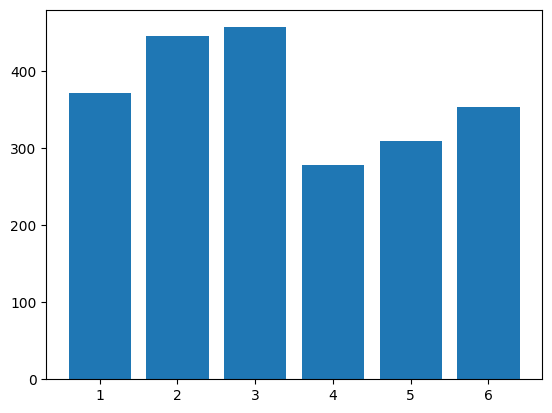

In [79]:
plt.bar(output_classes, train_output_count)
plt.show()

In [80]:
test_output_classes = runs_test.unique()
test_output_count = [test_output_classes_counts[1], test_output_classes_counts[2], test_output_classes_counts[3],
                test_output_classes_counts[4], test_output_classes_counts[5], test_output_classes_counts[6]]

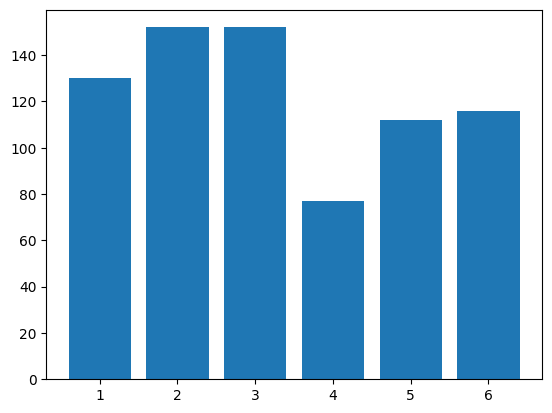

In [81]:
plt.bar(output_classes, test_output_count)
plt.show()

### Convert runs to categorical type for probability prediction of runs

In [ ]:
runs_train = to_categorical(runs_train - 1)
runs_test = to_categorical(runs_test - 1)

1240    3
345     1
1256    3
2624    6
1504    3
       ..
654     2
1275    3
729     2
1729    4
69      1
Name: runs, Length: 2215, dtype: int64
[[0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 ...
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]


### Building the model with Simple NN

In [83]:
def nvidia_model():
    model = Sequential()
    model.add(Dense(100, activation = 'relu', input_shape = (10, )))
    model.add(Dense(50, activation = 'relu'))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(6, activation='softmax'))

    model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
    return model

model = nvidia_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1100      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 dense_3 (Dense)             (None, 6)                 66        
                                                                 
Total params: 6726 (26.27 KB)
Trainable params: 6726 (26.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [84]:
run_prediction = model.fit(hand_coordinates_train, runs_train, validation_data=(hand_coordinates_test, runs_test), epochs=25, batch_size=64)

Epoch 1/25
35/35 [==============================] - 2s 11ms/step - loss: 1.7438 - accuracy: 0.2655 - val_loss: 1.6723 - val_accuracy: 0.2179
Epoch 2/25
35/35 [==============================] - 0s 4ms/step - loss: 1.5800 - accuracy: 0.4072 - val_loss: 1.4381 - val_accuracy: 0.5440
Epoch 3/25
35/35 [==============================] - 0s 4ms/step - loss: 1.2799 - accuracy: 0.6144 - val_loss: 1.0937 - val_accuracy: 0.6779
Epoch 4/25
35/35 [==============================] - 0s 5ms/step - loss: 0.9715 - accuracy: 0.7187 - val_loss: 0.8481 - val_accuracy: 0.7442
Epoch 5/25
35/35 [==============================] - 0s 4ms/step - loss: 0.7673 - accuracy: 0.7607 - val_loss: 0.6777 - val_accuracy: 0.7645
Epoch 6/25
35/35 [==============================] - 0s 5ms/step - loss: 0.6028 - accuracy: 0.7946 - val_loss: 0.5317 - val_accuracy: 0.8579
Epoch 7/25
35/35 [==============================] - 0s 4ms/step - loss: 0.4550 - accuracy: 0.9079 - val_loss: 0.3837 - val_accuracy: 0.9337
Epoch 8/25
35/35 [=

In [85]:
model.save('model.h5')
from google.colab import files
files.download('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [92]:
random_index = 231
print(model.predict(hand_coordinates_test))
print(runs_test)

24/24 [==============================] - 0s 2ms/step
[[8.4534240e-06 8.0223657e-07 1.8507394e-07 2.8412493e-03 9.9468660e-01
  2.4627042e-03]
 [2.3877937e-03 1.3720900e-04 1.4438607e-02 9.7648627e-01 6.5053930e-03
  4.4727181e-05]
 [3.9311271e-04 7.6630018e-03 9.9091274e-01 1.0312257e-03 1.6262833e-08
  7.6921891e-10]
 ...
 [2.4125742e-04 1.5039054e-03 9.9566829e-01 2.5865636e-03 2.2973852e-08
  5.0873322e-10]
 [3.3963863e-03 9.9283510e-01 3.7674676e-03 9.5202410e-07 1.2280558e-09
  6.0989707e-09]
 [5.5276626e-04 8.6876498e-06 4.4995453e-05 2.6113439e-01 7.3579586e-01
  2.4632479e-03]]
[[0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]]
